In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.1.1 Пример

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

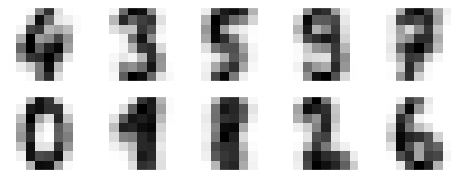

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Задание:

Дан массив данных

𝑋 = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])

Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [ ]:
from sklearn.cluster import KMeans

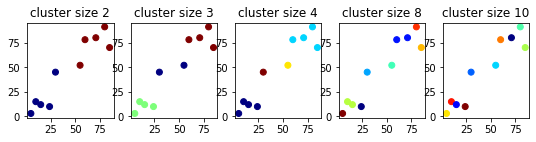

In [ ]:
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,45],[85,70],[71,80],[60,78],[55,52],[80,91]])
cluster_sizes = [2, 3, 4, 8, 10]
fig, axs = plt.subplots(1, 5, figsize=(9, 18))
for i in range(len(cluster_sizes)):
  kmeans = KMeans(n_clusters = cluster_sizes[i])
  clusters = kmeans.fit_predict(X)
  axs[i].set(title=f"cluster size {cluster_sizes[i]}", aspect=1)
  axs[i].scatter(X[:, 0], X[:, 1], c=clusters, cmap='jet')

plt.show()

1.1.2 Пример

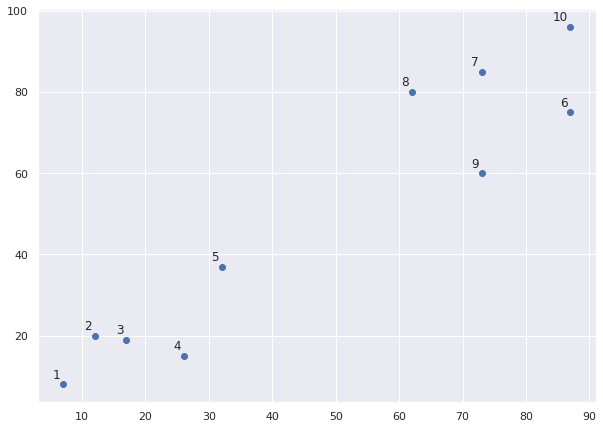

In [7]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(
    [[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96]])
labels = range(1, 11)
plt.figure(figsize= (10, 7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0], X[:,1], label= 'True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
  plt.annotate(
      label, xy = (x, y), xytext = (-3, 3), textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

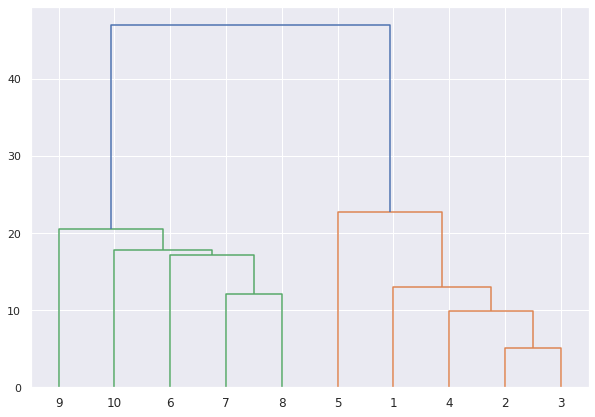

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top', labels = labelList, distance_sort = 'descending', show_leaf_counts = True)
plt.gca().invert_xaxis()
plt.show()

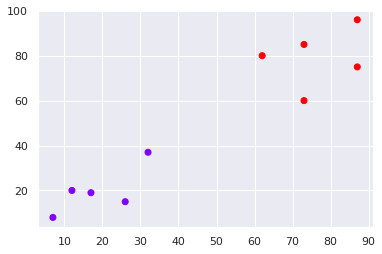

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

Пример:

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as numpy


url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
customer_data.shape

(200, 5)

In [25]:
data = customer_data.iloc[:, 3:5].values

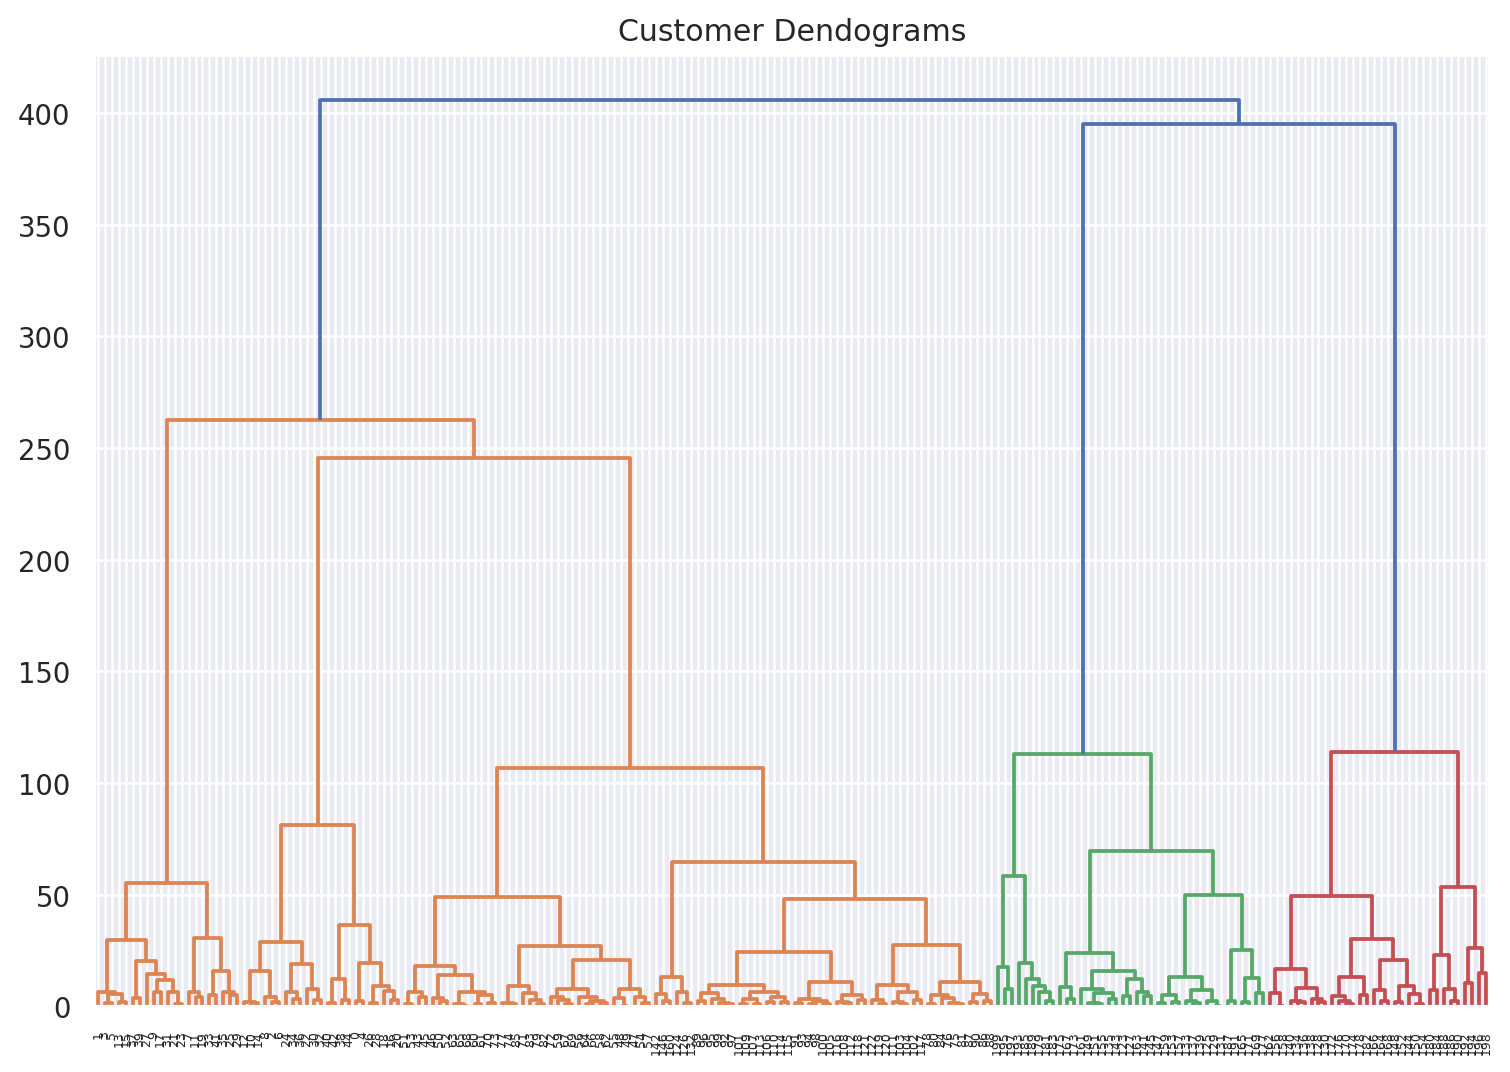

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7), dpi=180)
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [30]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

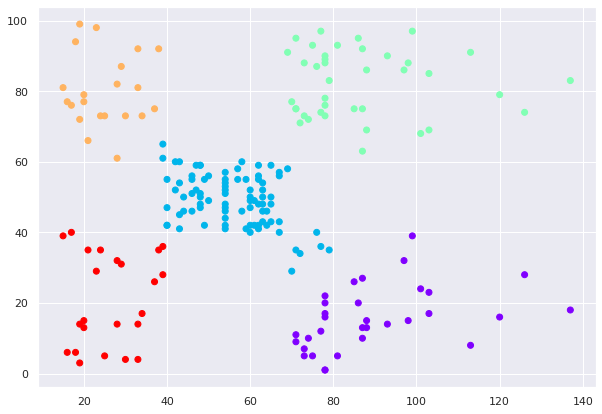

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Задание:

Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
url_iris="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
dataset_iris=pd.read_csv(url_iris)
dataset_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


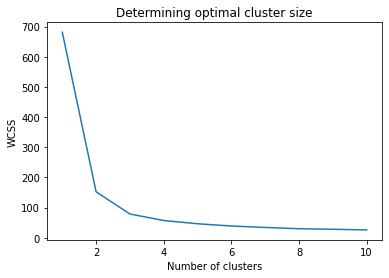

In [ ]:
X = dataset_iris.iloc[:, [0, 1, 2, 3]].values
y = pd.crosstab(index=dataset_iris["variety"], columns="count")


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Determining optimal cluster size')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# n_clusters = 3 is the optimal value using elbow method

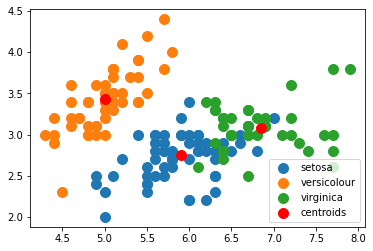

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, label = 'setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, label = 'versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'centroids')

plt.legend()

Задача

Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dataset_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


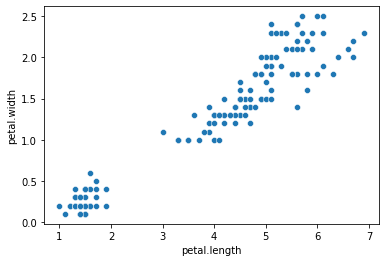

In [ ]:
iris_data = dataset_iris[['petal.length', 'petal.width']]
sns.scatterplot(x="petal.length", y="petal.width", data=iris_data)

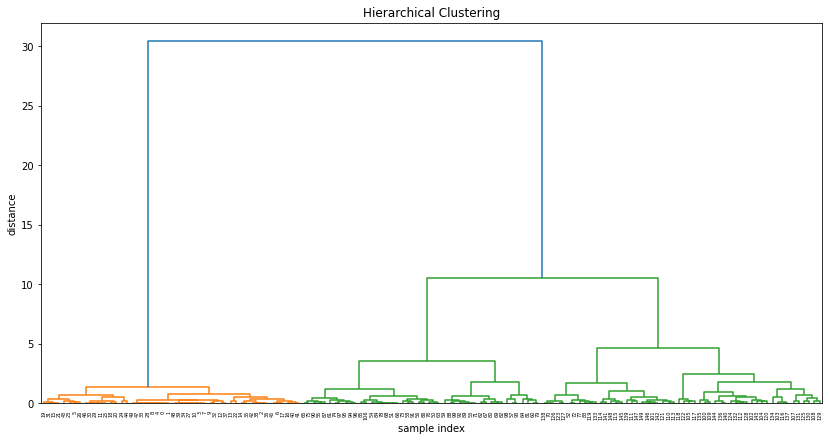

In [ ]:
groups = AgglomerativeClustering(n_clusters=3, linkage="ward")
groups.fit_predict(iris_data)

linkage_matrix = linkage(iris_data, 'ward')
plot = plt.figure(figsize=(14, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

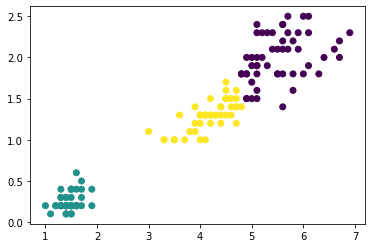

In [ ]:
plt.scatter(iris_data["petal.length"] ,iris_data["petal.width"], c=groups.labels_)
plt.show()